In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
#warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib

import pickle
import simplejson as json

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set a few plotting defaults
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 18
plt.rcParams['patch.edgecolor'] = 'k'
plt.rcParams["figure.figsize"] = [16,9]

pd.options.display.max_columns = 150

df = pd.read_csv("/users/akuppam/documents/Hprog/Py/rnb1015_2.csv")
df.head(5)

,date,region,marketing,visits,br,inq,gb,cb,nb,ss,ts,listings
0,1/1/16,AMR,NotPaid,1256288,6043,66022,6071,571,5500,485968.08000,144695.894200,10242216
1,1/1/16,AMR,Paid,189297,1092,11806,743,2,741,0.00000,14138.809600,2133795
2,1/1/16,UK,NotPaid,201797,435,9662,436,33,403,72698.92472,8317.105056,3561696
3,1/1/16,UK,Paid,55934,88,2749,61,1,60,0.00000,815.336426,890424
4,1/1/16,CE,NotPaid,200786,573,9250,435,31,404,40490.73159,12016.782410,3062480


In [2]:
df = df.loc[(df['region'] == 'UK') & (df['marketing'] == 'NotPaid')]
df = df[~(df['nb'] < 0)]
df.describe()

,visits,br,inq,gb,cb,nb,ss,ts,listings
count,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1.019000e+03
mean,208007.236506,874.540726,5669.378803,738.975466,97.000000,641.975466,64354.344591,67877.867010,4.132623e+06
std,49970.872125,321.850987,3230.824083,272.000936,42.682245,247.541682,51522.802513,43294.630309,6.174129e+05
min,65597.000000,143.000000,659.000000,114.000000,17.000000,97.000000,-32805.469450,-3355.851410,2.914890e+05
25%,180259.000000,655.000000,2768.500000,567.500000,68.000000,491.500000,33014.387520,36549.154035,4.080312e+06
50%,210091.000000,832.000000,5219.000000,704.000000,91.000000,605.000000,48819.573470,66097.854240,4.196176e+06
75%,239734.000000,1003.000000,7682.000000,823.000000,118.500000,711.000000,74321.636300,88053.269915,4.391588e+06
max,423613.000000,2845.000000,18841.000000,2257.000000,477.000000,2109.000000,540698.107300,279106.547400,4.838688e+06


In [3]:
df.head()

,date,region,marketing,visits,br,inq,gb,cb,nb,ss,ts,listings
2,1/1/16,UK,NotPaid,201797,435,9662,436,33,403,72698.92472,8317.105056,3561696
12,1/2/16,UK,NotPaid,230068,500,11385,484,33,451,88212.13002,9777.677209,3544800
22,1/3/16,UK,NotPaid,287058,717,14407,724,42,682,88985.55523,12676.852970,3543248
32,1/4/16,UK,NotPaid,283661,667,14891,754,82,672,266172.54600,14121.575680,3547232
42,1/5/16,UK,NotPaid,277621,664,13854,780,75,705,256567.41390,14941.685160,3526928


In [4]:
df.index = pd.to_datetime(df.date)

In [5]:
df.head()

,date,region,marketing,visits,br,inq,gb,cb,nb,ss,ts,listings
date,,,,,,,,,,,,
2016-01-01,1/1/16,UK,NotPaid,201797,435,9662,436,33,403,72698.92472,8317.105056,3561696
2016-01-02,1/2/16,UK,NotPaid,230068,500,11385,484,33,451,88212.13002,9777.677209,3544800
2016-01-03,1/3/16,UK,NotPaid,287058,717,14407,724,42,682,88985.55523,12676.852970,3543248
2016-01-04,1/4/16,UK,NotPaid,283661,667,14891,754,82,672,266172.54600,14121.575680,3547232
2016-01-05,1/5/16,UK,NotPaid,277621,664,13854,780,75,705,256567.41390,14941.685160,3526928


In [6]:
cols = ["nb"]
y = df[cols]
y.head()

,nb
date,
2016-01-01,403
2016-01-02,451
2016-01-03,682
2016-01-04,672
2016-01-05,705


In [65]:
p = q = range(1, 6) # Define the p and q parameters to take any value between 0 and 4 (incl 0, excl 4)S
d = range(0,2) # Should not be more than 2
pdq = list(itertools.product(p, d, q)) # Combinations of p, d and q
pdq_x_PDQ = [(x[0], x[1], x[2], 1) for x in list(itertools.product(p, d, q))] # Combinations of seasonal P, D and Q
print(pdq)
print(pdq_x_PDQ)

import warnings
warnings.filterwarnings("ignore")

model_params = []
for param in pdq:
    for seasonal_param in pdq_x_PDQ:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            #trend='ct',
                                            order=param,
                                            seasonal_order=seasonal_param,
                                            freq='D',
                                            enforce_stationarity=True,
                                            enforce_invertibility=True)
            results = mod.fit()
            print('SARIMA{}x{} - AIC:{}'.format(param, seasonal_param, results.aic))
            model_params.append((param, seasonal_param, results.aic))
        except:
            continue

[(1, 0, 1), (1, 0, 2), (1, 0, 3), (1, 0, 4), (1, 0, 5), (1, 1, 1), (1, 1, 2), (1, 1, 3), (1, 1, 4), (1, 1, 5), (2, 0, 1), (2, 0, 2), (2, 0, 3), (2, 0, 4), (2, 0, 5), (2, 1, 1), (2, 1, 2), (2, 1, 3), (2, 1, 4), (2, 1, 5), (3, 0, 1), (3, 0, 2), (3, 0, 3), (3, 0, 4), (3, 0, 5), (3, 1, 1), (3, 1, 2), (3, 1, 3), (3, 1, 4), (3, 1, 5), (4, 0, 1), (4, 0, 2), (4, 0, 3), (4, 0, 4), (4, 0, 5), (4, 1, 1), (4, 1, 2), (4, 1, 3), (4, 1, 4), (4, 1, 5), (5, 0, 1), (5, 0, 2), (5, 0, 3), (5, 0, 4), (5, 0, 5), (5, 1, 1), (5, 1, 2), (5, 1, 3), (5, 1, 4), (5, 1, 5)]
[(1, 0, 1, 1), (1, 0, 2, 1), (1, 0, 3, 1), (1, 0, 4, 1), (1, 0, 5, 1), (1, 1, 1, 1), (1, 1, 2, 1), (1, 1, 3, 1), (1, 1, 4, 1), (1, 1, 5, 1), (2, 0, 1, 1), (2, 0, 2, 1), (2, 0, 3, 1), (2, 0, 4, 1), (2, 0, 5, 1), (2, 1, 1, 1), (2, 1, 2, 1), (2, 1, 3, 1), (2, 1, 4, 1), (2, 1, 5, 1), (3, 0, 1, 1), (3, 0, 2, 1), (3, 0, 3, 1), (3, 0, 4, 1), (3, 0, 5, 1), (3, 1, 1, 1), (3, 1, 2, 1), (3, 1, 3, 1), (3, 1, 4, 1), (3, 1, 5, 1), (4, 0, 1, 1), (4, 0, 2, 1), 

SARIMA(1, 0, 3)x(4, 0, 1, 1) - AIC:12293.737432117912
SARIMA(1, 0, 3)x(4, 0, 2, 1) - AIC:12269.145557896416
SARIMA(1, 0, 3)x(4, 0, 3, 1) - AIC:12277.306087363606
SARIMA(1, 0, 3)x(4, 0, 4, 1) - AIC:12266.90681067613
SARIMA(1, 0, 3)x(4, 0, 5, 1) - AIC:12272.110014055837
SARIMA(1, 0, 3)x(4, 1, 1, 1) - AIC:12233.362793556
SARIMA(1, 0, 3)x(4, 1, 2, 1) - AIC:12252.930431284658
SARIMA(1, 0, 3)x(4, 1, 3, 1) - AIC:12245.30446579744
SARIMA(1, 0, 3)x(4, 1, 4, 1) - AIC:12181.237263372044
SARIMA(1, 0, 3)x(4, 1, 5, 1) - AIC:12192.71003646545
SARIMA(1, 0, 3)x(5, 0, 1, 1) - AIC:12264.207970988125
SARIMA(1, 0, 3)x(5, 0, 2, 1) - AIC:12250.569452869637
SARIMA(1, 0, 3)x(5, 0, 3, 1) - AIC:12220.446373110392
SARIMA(1, 0, 3)x(5, 0, 4, 1) - AIC:12265.487474239111
SARIMA(1, 0, 3)x(5, 0, 5, 1) - AIC:12202.094143590479
SARIMA(1, 0, 3)x(5, 1, 1, 1) - AIC:12234.54691672662
SARIMA(1, 0, 3)x(5, 1, 2, 1) - AIC:12272.614764451619
SARIMA(1, 0, 3)x(5, 1, 3, 1) - AIC:12238.924905875178
SARIMA(1, 0, 3)x(5, 1, 4, 1) - AIC:

SARIMA(1, 1, 1)x(4, 0, 5, 1) - AIC:12209.180525433232
SARIMA(1, 1, 1)x(4, 1, 1, 1) - AIC:12373.96820793709
SARIMA(1, 1, 1)x(4, 1, 2, 1) - AIC:12338.533280159962
SARIMA(1, 1, 1)x(4, 1, 3, 1) - AIC:12438.230844921276
SARIMA(1, 1, 1)x(4, 1, 4, 1) - AIC:12434.776874788351
SARIMA(1, 1, 1)x(4, 1, 5, 1) - AIC:12446.663696280972
SARIMA(1, 1, 1)x(5, 0, 1, 1) - AIC:12304.99959934383
SARIMA(1, 1, 1)x(5, 0, 2, 1) - AIC:12403.254650382143
SARIMA(1, 1, 1)x(5, 0, 3, 1) - AIC:12275.82441340011
SARIMA(1, 1, 1)x(5, 0, 4, 1) - AIC:12219.180394628513
SARIMA(1, 1, 1)x(5, 0, 5, 1) - AIC:12210.662133666887
SARIMA(1, 1, 1)x(5, 1, 1, 1) - AIC:12353.230760434315
SARIMA(1, 1, 1)x(5, 1, 2, 1) - AIC:12408.768486055229
SARIMA(1, 1, 1)x(5, 1, 3, 1) - AIC:12394.222790484735
SARIMA(1, 1, 1)x(5, 1, 4, 1) - AIC:12309.492162016271
SARIMA(1, 1, 1)x(5, 1, 5, 1) - AIC:12227.855370506637
SARIMA(1, 1, 2)x(1, 0, 1, 1) - AIC:12496.858945080696
SARIMA(1, 1, 2)x(1, 0, 2, 1) - AIC:12494.510220403397
SARIMA(1, 1, 2)x(1, 0, 3, 1) - 

SARIMA(1, 1, 4)x(4, 1, 4, 1) - AIC:12432.82004906022
SARIMA(1, 1, 4)x(4, 1, 5, 1) - AIC:12265.506166828938
SARIMA(1, 1, 4)x(5, 0, 1, 1) - AIC:12202.95599782695
SARIMA(1, 1, 4)x(5, 0, 2, 1) - AIC:12255.714238435186
SARIMA(1, 1, 4)x(5, 0, 3, 1) - AIC:12181.581373994502
SARIMA(1, 1, 4)x(5, 0, 4, 1) - AIC:12176.151021175327
SARIMA(1, 1, 4)x(5, 0, 5, 1) - AIC:12169.058817471181
SARIMA(1, 1, 4)x(5, 1, 1, 1) - AIC:12228.527274271662
SARIMA(1, 1, 4)x(5, 1, 2, 1) - AIC:12267.814625548112
SARIMA(1, 1, 4)x(5, 1, 3, 1) - AIC:12251.299663725102
SARIMA(1, 1, 4)x(5, 1, 4, 1) - AIC:12318.342085040309
SARIMA(1, 1, 4)x(5, 1, 5, 1) - AIC:12260.23946026183
SARIMA(1, 1, 5)x(1, 0, 1, 1) - AIC:12416.35289819788
SARIMA(1, 1, 5)x(1, 0, 2, 1) - AIC:12384.537234159361
SARIMA(1, 1, 5)x(1, 0, 3, 1) - AIC:12314.650072420713
SARIMA(1, 1, 5)x(1, 0, 4, 1) - AIC:12310.539145725248
SARIMA(1, 1, 5)x(1, 0, 5, 1) - AIC:12297.616416777131
SARIMA(1, 1, 5)x(1, 1, 1, 1) - AIC:12485.711669257169
SARIMA(1, 1, 5)x(1, 1, 2, 1) - A

SARIMA(2, 0, 2)x(5, 0, 2, 1) - AIC:12280.10307246829
SARIMA(2, 0, 2)x(5, 0, 3, 1) - AIC:12254.635898939261
SARIMA(2, 0, 2)x(5, 0, 4, 1) - AIC:12224.04895341909
SARIMA(2, 0, 2)x(5, 0, 5, 1) - AIC:12204.347303642
SARIMA(2, 0, 2)x(5, 1, 1, 1) - AIC:12202.532330623806
SARIMA(2, 0, 2)x(5, 1, 2, 1) - AIC:12215.621401382474
SARIMA(2, 0, 2)x(5, 1, 3, 1) - AIC:12199.466915662344
SARIMA(2, 0, 2)x(5, 1, 4, 1) - AIC:12148.131204744443
SARIMA(2, 0, 2)x(5, 1, 5, 1) - AIC:12142.418001549904
SARIMA(2, 0, 3)x(1, 0, 1, 1) - AIC:12263.908278041188
SARIMA(2, 0, 3)x(1, 0, 2, 1) - AIC:12255.185050601782
SARIMA(2, 0, 3)x(1, 0, 3, 1) - AIC:12246.43688649052
SARIMA(2, 0, 3)x(1, 0, 4, 1) - AIC:12466.146768510755
SARIMA(2, 0, 3)x(1, 0, 5, 1) - AIC:12240.363221381072
SARIMA(2, 0, 3)x(1, 1, 1, 1) - AIC:12239.462288676392
SARIMA(2, 0, 3)x(1, 1, 2, 1) - AIC:12220.179167912083
SARIMA(2, 0, 3)x(1, 1, 3, 1) - AIC:12218.130733865912
SARIMA(2, 0, 3)x(1, 1, 4, 1) - AIC:12217.855292131173
SARIMA(2, 0, 3)x(1, 1, 5, 1) - AIC

SARIMA(2, 0, 5)x(5, 0, 5, 1) - AIC:12200.618942167233
SARIMA(2, 0, 5)x(5, 1, 1, 1) - AIC:12168.874313830915
SARIMA(2, 0, 5)x(5, 1, 2, 1) - AIC:12236.084555901109
SARIMA(2, 0, 5)x(5, 1, 3, 1) - AIC:12157.132427800254
SARIMA(2, 0, 5)x(5, 1, 4, 1) - AIC:12145.244763570485
SARIMA(2, 0, 5)x(5, 1, 5, 1) - AIC:12152.481665387213
SARIMA(2, 1, 1)x(1, 0, 1, 1) - AIC:12488.159657340264
SARIMA(2, 1, 1)x(1, 0, 2, 1) - AIC:12271.587945069554
SARIMA(2, 1, 1)x(1, 0, 3, 1) - AIC:12261.578060186854
SARIMA(2, 1, 1)x(1, 0, 4, 1) - AIC:12272.699802291878
SARIMA(2, 1, 1)x(1, 0, 5, 1) - AIC:12234.305695142742
SARIMA(2, 1, 1)x(1, 1, 1, 1) - AIC:12475.918348836816
SARIMA(2, 1, 1)x(1, 1, 2, 1) - AIC:12504.50485476568
SARIMA(2, 1, 1)x(1, 1, 3, 1) - AIC:12297.637423869348
SARIMA(2, 1, 1)x(1, 1, 4, 1) - AIC:12500.62431562437
SARIMA(2, 1, 1)x(1, 1, 5, 1) - AIC:12393.952414667987
SARIMA(2, 1, 1)x(2, 0, 1, 1) - AIC:12490.16660194642
SARIMA(2, 1, 1)x(2, 0, 2, 1) - AIC:12489.543051301767
SARIMA(2, 1, 1)x(2, 0, 3, 1) - 

SARIMA(2, 1, 3)x(5, 1, 3, 1) - AIC:12274.645427322852
SARIMA(2, 1, 3)x(5, 1, 4, 1) - AIC:12186.749078546374
SARIMA(2, 1, 3)x(5, 1, 5, 1) - AIC:12209.546734006999
SARIMA(2, 1, 4)x(1, 0, 1, 1) - AIC:12277.354051352111
SARIMA(2, 1, 4)x(1, 0, 2, 1) - AIC:12229.77688494524
SARIMA(2, 1, 4)x(1, 0, 3, 1) - AIC:12228.108597280445
SARIMA(2, 1, 4)x(1, 0, 4, 1) - AIC:12229.606911645777
SARIMA(2, 1, 4)x(1, 0, 5, 1) - AIC:12230.975291468827
SARIMA(2, 1, 4)x(1, 1, 1, 1) - AIC:12287.347565119391
SARIMA(2, 1, 4)x(1, 1, 2, 1) - AIC:12473.387176781314
SARIMA(2, 1, 4)x(1, 1, 3, 1) - AIC:12408.439373859532
SARIMA(2, 1, 4)x(1, 1, 4, 1) - AIC:12434.536449506955
SARIMA(2, 1, 4)x(1, 1, 5, 1) - AIC:12280.02211661782
SARIMA(2, 1, 4)x(2, 0, 1, 1) - AIC:12203.506478150164
SARIMA(2, 1, 4)x(2, 0, 2, 1) - AIC:12235.186118916985
SARIMA(2, 1, 4)x(2, 0, 3, 1) - AIC:12193.362403157806
SARIMA(2, 1, 4)x(2, 0, 4, 1) - AIC:12261.46211337242
SARIMA(2, 1, 4)x(2, 0, 5, 1) - AIC:12221.393237242439
SARIMA(2, 1, 4)x(2, 1, 1, 1) - 

SARIMA(3, 0, 2)x(1, 0, 1, 1) - AIC:12271.177585656704
SARIMA(3, 0, 2)x(1, 0, 2, 1) - AIC:12260.83630179167
SARIMA(3, 0, 2)x(1, 0, 3, 1) - AIC:12257.104139534544
SARIMA(3, 0, 2)x(1, 0, 4, 1) - AIC:12261.363029600028
SARIMA(3, 0, 2)x(1, 0, 5, 1) - AIC:12246.926141402877
SARIMA(3, 0, 2)x(1, 1, 1, 1) - AIC:12251.520695268646
SARIMA(3, 0, 2)x(1, 1, 2, 1) - AIC:12261.015325203796
SARIMA(3, 0, 2)x(1, 1, 3, 1) - AIC:12212.70912679955
SARIMA(3, 0, 2)x(1, 1, 4, 1) - AIC:12232.140590669982
SARIMA(3, 0, 2)x(1, 1, 5, 1) - AIC:12218.77804836983
SARIMA(3, 0, 2)x(2, 0, 1, 1) - AIC:12321.381789627474
SARIMA(3, 0, 2)x(2, 0, 2, 1) - AIC:12279.443971557197
SARIMA(3, 0, 2)x(2, 0, 3, 1) - AIC:12249.203344684462
SARIMA(3, 0, 2)x(2, 0, 4, 1) - AIC:12251.74958991569
SARIMA(3, 0, 2)x(2, 0, 5, 1) - AIC:12246.950874244267
SARIMA(3, 0, 2)x(2, 1, 1, 1) - AIC:12214.554959725669
SARIMA(3, 0, 2)x(2, 1, 2, 1) - AIC:12274.198459980398
SARIMA(3, 0, 2)x(2, 1, 3, 1) - AIC:12212.539225634213
SARIMA(3, 0, 2)x(2, 1, 4, 1) - A

SARIMA(3, 0, 5)x(1, 0, 5, 1) - AIC:12325.843001140009
SARIMA(3, 0, 5)x(1, 1, 1, 1) - AIC:12227.64332060132
SARIMA(3, 0, 5)x(1, 1, 2, 1) - AIC:12224.212095414827
SARIMA(3, 0, 5)x(1, 1, 3, 1) - AIC:12227.81269690541
SARIMA(3, 0, 5)x(1, 1, 4, 1) - AIC:12209.702816073272
SARIMA(3, 0, 5)x(1, 1, 5, 1) - AIC:12204.755043898283
SARIMA(3, 0, 5)x(2, 0, 1, 1) - AIC:12199.016287649867
SARIMA(3, 0, 5)x(2, 0, 2, 1) - AIC:12240.005326797971
SARIMA(3, 0, 5)x(2, 0, 3, 1) - AIC:12248.611254030313
SARIMA(3, 0, 5)x(2, 0, 4, 1) - AIC:12257.08359740106
SARIMA(3, 0, 5)x(2, 0, 5, 1) - AIC:12253.792614926775
SARIMA(3, 0, 5)x(2, 1, 1, 1) - AIC:12226.0454607988
SARIMA(3, 0, 5)x(2, 1, 2, 1) - AIC:12225.84100739833
SARIMA(3, 0, 5)x(2, 1, 3, 1) - AIC:12158.465851325456
SARIMA(3, 0, 5)x(2, 1, 4, 1) - AIC:12207.092656339308
SARIMA(3, 0, 5)x(2, 1, 5, 1) - AIC:12205.127057942747
SARIMA(3, 0, 5)x(3, 0, 1, 1) - AIC:12196.460741720151
SARIMA(3, 0, 5)x(3, 0, 2, 1) - AIC:12231.88884453493
SARIMA(3, 0, 5)x(3, 0, 3, 1) - AIC:

SARIMA(3, 1, 3)x(1, 1, 3, 1) - AIC:12512.708683135115
SARIMA(3, 1, 3)x(1, 1, 4, 1) - AIC:12402.614665943498
SARIMA(3, 1, 3)x(1, 1, 5, 1) - AIC:12386.051606640518
SARIMA(3, 1, 3)x(2, 0, 1, 1) - AIC:12221.72976838751
SARIMA(3, 1, 3)x(2, 0, 2, 1) - AIC:12217.681054826753
SARIMA(3, 1, 3)x(2, 0, 3, 1) - AIC:12214.376259320958
SARIMA(3, 1, 3)x(2, 0, 4, 1) - AIC:12144.05064531558
SARIMA(3, 1, 3)x(2, 0, 5, 1) - AIC:12217.060488520217
SARIMA(3, 1, 3)x(2, 1, 1, 1) - AIC:12328.987447762844
SARIMA(3, 1, 3)x(2, 1, 2, 1) - AIC:12493.219267374014
SARIMA(3, 1, 3)x(2, 1, 3, 1) - AIC:12465.659219483156
SARIMA(3, 1, 3)x(2, 1, 4, 1) - AIC:12197.249190147153
SARIMA(3, 1, 3)x(2, 1, 5, 1) - AIC:12214.791732999187
SARIMA(3, 1, 3)x(3, 0, 1, 1) - AIC:12226.397879235774
SARIMA(3, 1, 3)x(3, 0, 2, 1) - AIC:12375.20356490799
SARIMA(3, 1, 3)x(3, 0, 3, 1) - AIC:12377.54979053959
SARIMA(3, 1, 3)x(3, 0, 4, 1) - AIC:12142.316299894663
SARIMA(3, 1, 3)x(3, 0, 5, 1) - AIC:12155.705568826474
SARIMA(3, 1, 3)x(3, 1, 1, 1) - A

SARIMA(4, 0, 1)x(2, 0, 1, 1) - AIC:12452.175841398806
SARIMA(4, 0, 1)x(2, 0, 2, 1) - AIC:12289.046639369779
SARIMA(4, 0, 1)x(2, 0, 3, 1) - AIC:12501.016090567817
SARIMA(4, 0, 1)x(2, 0, 4, 1) - AIC:12523.94841940183
SARIMA(4, 0, 1)x(2, 0, 5, 1) - AIC:12445.703409096532
SARIMA(4, 0, 1)x(2, 1, 1, 1) - AIC:12304.892591154885
SARIMA(4, 0, 1)x(2, 1, 2, 1) - AIC:12232.406812426167
SARIMA(4, 0, 1)x(2, 1, 3, 1) - AIC:12246.423980347732
SARIMA(4, 0, 1)x(2, 1, 4, 1) - AIC:12206.769945405791
SARIMA(4, 0, 1)x(2, 1, 5, 1) - AIC:12249.693787197899
SARIMA(4, 0, 1)x(3, 0, 1, 1) - AIC:12321.639842371307
SARIMA(4, 0, 1)x(3, 0, 2, 1) - AIC:12279.736279482462
SARIMA(4, 0, 1)x(3, 0, 3, 1) - AIC:12323.467235325625
SARIMA(4, 0, 1)x(3, 0, 4, 1) - AIC:12286.04910265101
SARIMA(4, 0, 1)x(3, 0, 5, 1) - AIC:12239.627475661224
SARIMA(4, 0, 1)x(3, 1, 1, 1) - AIC:12174.329824244935
SARIMA(4, 0, 1)x(3, 1, 2, 1) - AIC:12209.607635937704
SARIMA(4, 0, 1)x(3, 1, 3, 1) - AIC:12213.043198641148
SARIMA(4, 0, 1)x(3, 1, 4, 1) -

SARIMA(4, 0, 4)x(2, 0, 5, 1) - AIC:12255.483657231176
SARIMA(4, 0, 4)x(2, 1, 1, 1) - AIC:12155.753280464309
SARIMA(4, 0, 4)x(2, 1, 2, 1) - AIC:12152.501080968592
SARIMA(4, 0, 4)x(2, 1, 3, 1) - AIC:12152.049789145469
SARIMA(4, 0, 4)x(2, 1, 4, 1) - AIC:12140.635413606495
SARIMA(4, 0, 4)x(2, 1, 5, 1) - AIC:12150.41780894695
SARIMA(4, 0, 4)x(3, 0, 1, 1) - AIC:12249.990365751233
SARIMA(4, 0, 4)x(3, 0, 2, 1) - AIC:12199.404834998082
SARIMA(4, 0, 4)x(3, 0, 3, 1) - AIC:12268.201162924008
SARIMA(4, 0, 4)x(3, 0, 4, 1) - AIC:12189.716886072385
SARIMA(4, 0, 4)x(3, 0, 5, 1) - AIC:12198.37865887603
SARIMA(4, 0, 4)x(3, 1, 1, 1) - AIC:12141.68474990431
SARIMA(4, 0, 4)x(3, 1, 2, 1) - AIC:12149.697521033382
SARIMA(4, 0, 4)x(3, 1, 3, 1) - AIC:12147.655149966133
SARIMA(4, 0, 4)x(3, 1, 4, 1) - AIC:12154.651072491375
SARIMA(4, 0, 4)x(3, 1, 5, 1) - AIC:12135.40658153177
SARIMA(4, 0, 4)x(4, 0, 1, 1) - AIC:12253.122152716478
SARIMA(4, 0, 4)x(4, 0, 2, 1) - AIC:12184.934129533045
SARIMA(4, 0, 4)x(4, 0, 3, 1) - A

SARIMA(4, 1, 2)x(2, 1, 4, 1) - AIC:12180.25675175109
SARIMA(4, 1, 2)x(2, 1, 5, 1) - AIC:12198.759985272085
SARIMA(4, 1, 2)x(3, 0, 1, 1) - AIC:12176.30822723933
SARIMA(4, 1, 2)x(3, 0, 2, 1) - AIC:12174.441632588942
SARIMA(4, 1, 2)x(3, 0, 3, 1) - AIC:12169.944636030556
SARIMA(4, 1, 2)x(3, 0, 4, 1) - AIC:12141.669010448955
SARIMA(4, 1, 2)x(3, 0, 5, 1) - AIC:12157.809617433575
SARIMA(4, 1, 2)x(3, 1, 1, 1) - AIC:12245.227108255185
SARIMA(4, 1, 2)x(3, 1, 2, 1) - AIC:12246.202717765762
SARIMA(4, 1, 2)x(3, 1, 3, 1) - AIC:12244.705783190151
SARIMA(4, 1, 2)x(3, 1, 4, 1) - AIC:12252.364086920476
SARIMA(4, 1, 2)x(3, 1, 5, 1) - AIC:12171.607252319849
SARIMA(4, 1, 2)x(4, 0, 1, 1) - AIC:12174.611179104986
SARIMA(4, 1, 2)x(4, 0, 2, 1) - AIC:12225.604030602964
SARIMA(4, 1, 2)x(4, 0, 3, 1) - AIC:12232.664147531383
SARIMA(4, 1, 2)x(4, 0, 4, 1) - AIC:12143.642819887298
SARIMA(4, 1, 2)x(4, 0, 5, 1) - AIC:12140.18705219901
SARIMA(4, 1, 2)x(4, 1, 1, 1) - AIC:12222.056528559548
SARIMA(4, 1, 2)x(4, 1, 3, 1) - 

SARIMA(4, 1, 5)x(3, 0, 3, 1) - AIC:12152.042875529769
SARIMA(4, 1, 5)x(3, 0, 4, 1) - AIC:12147.203940481442
SARIMA(4, 1, 5)x(3, 0, 5, 1) - AIC:12145.301980756985
SARIMA(4, 1, 5)x(3, 1, 1, 1) - AIC:12208.06443618158
SARIMA(4, 1, 5)x(3, 1, 2, 1) - AIC:12212.922235594217
SARIMA(4, 1, 5)x(3, 1, 3, 1) - AIC:12216.21148353776
SARIMA(4, 1, 5)x(3, 1, 4, 1) - AIC:12213.904982875456
SARIMA(4, 1, 5)x(3, 1, 5, 1) - AIC:12221.040878132397
SARIMA(4, 1, 5)x(4, 0, 1, 1) - AIC:12154.724735320779
SARIMA(4, 1, 5)x(4, 0, 2, 1) - AIC:12147.652675601497
SARIMA(4, 1, 5)x(4, 0, 3, 1) - AIC:12153.610646783594
SARIMA(4, 1, 5)x(4, 0, 4, 1) - AIC:12138.724895604593
SARIMA(4, 1, 5)x(4, 0, 5, 1) - AIC:12177.78091352246
SARIMA(4, 1, 5)x(4, 1, 1, 1) - AIC:12219.612320335034
SARIMA(4, 1, 5)x(4, 1, 2, 1) - AIC:12230.492544288478
SARIMA(4, 1, 5)x(4, 1, 3, 1) - AIC:12230.735242683728
SARIMA(4, 1, 5)x(4, 1, 4, 1) - AIC:12201.850760038516
SARIMA(4, 1, 5)x(4, 1, 5, 1) - AIC:12298.714243516295
SARIMA(4, 1, 5)x(5, 0, 1, 1) - 

SARIMA(5, 0, 3)x(3, 1, 2, 1) - AIC:12136.510442676736
SARIMA(5, 0, 3)x(3, 1, 3, 1) - AIC:12180.987250748953
SARIMA(5, 0, 3)x(3, 1, 4, 1) - AIC:12120.205655040401
SARIMA(5, 0, 3)x(3, 1, 5, 1) - AIC:12129.723248329516
SARIMA(5, 0, 3)x(4, 0, 1, 1) - AIC:12186.22889916769
SARIMA(5, 0, 3)x(4, 0, 2, 1) - AIC:12189.947399457982
SARIMA(5, 0, 3)x(4, 0, 3, 1) - AIC:12246.863568887404
SARIMA(5, 0, 3)x(4, 0, 4, 1) - AIC:12140.823441123786
SARIMA(5, 0, 3)x(4, 0, 5, 1) - AIC:12144.686980538756
SARIMA(5, 0, 3)x(4, 1, 1, 1) - AIC:12172.086621384406
SARIMA(5, 0, 3)x(4, 1, 2, 1) - AIC:12133.398863328179
SARIMA(5, 0, 3)x(4, 1, 3, 1) - AIC:12180.320380463521
SARIMA(5, 0, 3)x(4, 1, 4, 1) - AIC:12133.162641075394
SARIMA(5, 0, 3)x(4, 1, 5, 1) - AIC:12144.75760820261
SARIMA(5, 0, 3)x(5, 0, 1, 1) - AIC:12188.388701772772
SARIMA(5, 0, 3)x(5, 0, 2, 1) - AIC:12324.267493197505
SARIMA(5, 0, 3)x(5, 0, 3, 1) - AIC:12509.016215476113
SARIMA(5, 0, 3)x(5, 0, 4, 1) - AIC:12140.94781231054
SARIMA(5, 0, 3)x(5, 0, 5, 1) - 

SARIMA(5, 1, 1)x(3, 1, 5, 1) - AIC:12322.32660093459
SARIMA(5, 1, 1)x(4, 0, 1, 1) - AIC:12176.29732546238
SARIMA(5, 1, 1)x(4, 0, 2, 1) - AIC:12168.85426503699
SARIMA(5, 1, 1)x(4, 0, 3, 1) - AIC:12188.394980901161
SARIMA(5, 1, 1)x(4, 0, 4, 1) - AIC:12166.574231370096
SARIMA(5, 1, 1)x(4, 0, 5, 1) - AIC:12195.470230477842
SARIMA(5, 1, 1)x(4, 1, 1, 1) - AIC:12260.72533347301
SARIMA(5, 1, 1)x(4, 1, 2, 1) - AIC:12340.859548250435
SARIMA(5, 1, 1)x(4, 1, 3, 1) - AIC:12365.767756015586
SARIMA(5, 1, 1)x(4, 1, 4, 1) - AIC:12359.678631082461
SARIMA(5, 1, 1)x(4, 1, 5, 1) - AIC:12358.082863737523
SARIMA(5, 1, 1)x(5, 0, 1, 1) - AIC:12195.536696239331
SARIMA(5, 1, 1)x(5, 0, 2, 1) - AIC:12180.66921879791
SARIMA(5, 1, 1)x(5, 0, 3, 1) - AIC:12173.341147857263
SARIMA(5, 1, 1)x(5, 0, 4, 1) - AIC:12160.052175497996
SARIMA(5, 1, 1)x(5, 0, 5, 1) - AIC:12164.004408501096
SARIMA(5, 1, 1)x(5, 1, 1, 1) - AIC:12232.974343095684
SARIMA(5, 1, 1)x(5, 1, 2, 1) - AIC:12345.842040361542
SARIMA(5, 1, 1)x(5, 1, 3, 1) - AI

SARIMA(5, 1, 4)x(4, 0, 3, 1) - AIC:12129.546085828662
SARIMA(5, 1, 4)x(4, 0, 4, 1) - AIC:12138.757906452247
SARIMA(5, 1, 4)x(4, 0, 5, 1) - AIC:12125.46330734286
SARIMA(5, 1, 4)x(4, 1, 1, 1) - AIC:12241.480631927134
SARIMA(5, 1, 4)x(4, 1, 2, 1) - AIC:12199.641745706787
SARIMA(5, 1, 4)x(4, 1, 3, 1) - AIC:12223.764675424869
SARIMA(5, 1, 4)x(4, 1, 4, 1) - AIC:12264.45907843783
SARIMA(5, 1, 4)x(4, 1, 5, 1) - AIC:12203.203398392861
SARIMA(5, 1, 4)x(5, 0, 1, 1) - AIC:12139.406393609177
SARIMA(5, 1, 4)x(5, 0, 2, 1) - AIC:12130.65748783317
SARIMA(5, 1, 4)x(5, 0, 3, 1) - AIC:12135.340113929848
SARIMA(5, 1, 4)x(5, 0, 4, 1) - AIC:12169.415675325743
SARIMA(5, 1, 4)x(5, 0, 5, 1) - AIC:12136.405014461237
SARIMA(5, 1, 4)x(5, 1, 1, 1) - AIC:12246.253823283238
SARIMA(5, 1, 4)x(5, 1, 2, 1) - AIC:12212.288696943524
SARIMA(5, 1, 4)x(5, 1, 3, 1) - AIC:12202.00819192817
SARIMA(5, 1, 4)x(5, 1, 4, 1) - AIC:12301.2486145029
SARIMA(5, 1, 4)x(5, 1, 5, 1) - AIC:12206.197153211386
SARIMA(5, 1, 5)x(1, 0, 1, 1) - AIC

In [66]:
model_params.sort(key = lambda tup:tup[2])
for sublist in model_params[:1]:
    pdq = (sublist[:1])
order = pdq[0]
print('order =', order)
for sublist in model_params[:1]:
    PDQ = (sublist[:2])
sorder = PDQ[1]
print('sorder =', sorder)

order = (5, 0, 5)
sorder = (4, 1, 4, 1)


In [93]:
mod = sm.tsa.statespace.SARIMAX(y, 					
                                #trend='t', 					
                                order=(7,0,7), 					
                                seasonal_order=(7,0,7,7),					
                                #freq='D',
                                enforce_stationarity=False,					
                                enforce_invertibility=False)					
results = mod.fit()					
print(results.summary())					

                                 Statespace Model Results                                
Dep. Variable:                                nb   No. Observations:                 1019
Model:             SARIMAX(7, 0, 7)x(7, 0, 7, 7)   Log Likelihood               -5697.261
Date:                           Mon, 12 Nov 2018   AIC                          11452.522
Time:                                   13:26:28   BIC                          11593.724
Sample:                               01-01-2016   HQIC                         11506.290
                                    - 10-15-2018                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9077      0.558      1.627      0.104      -0.186       2.001
ar.L2         -0.3833      0.859     -0.446

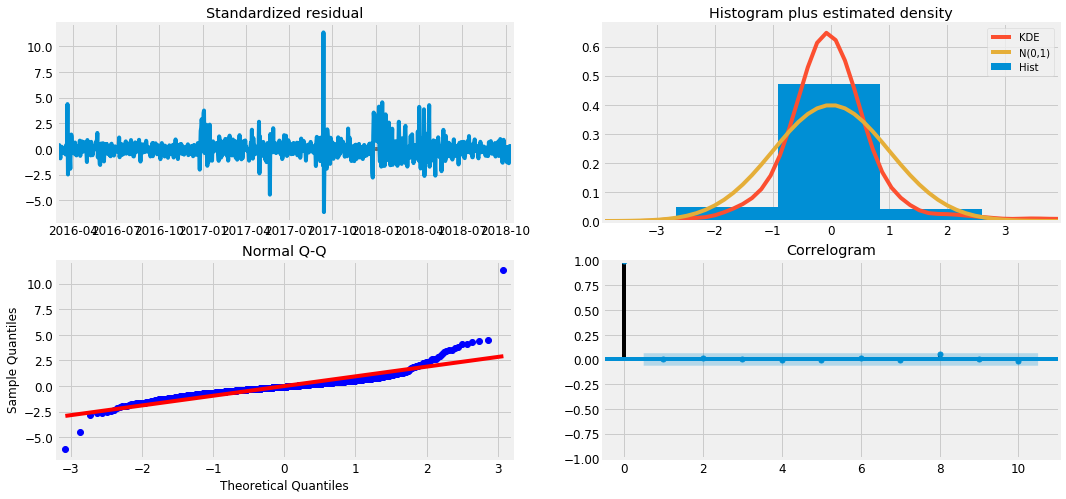

In [94]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

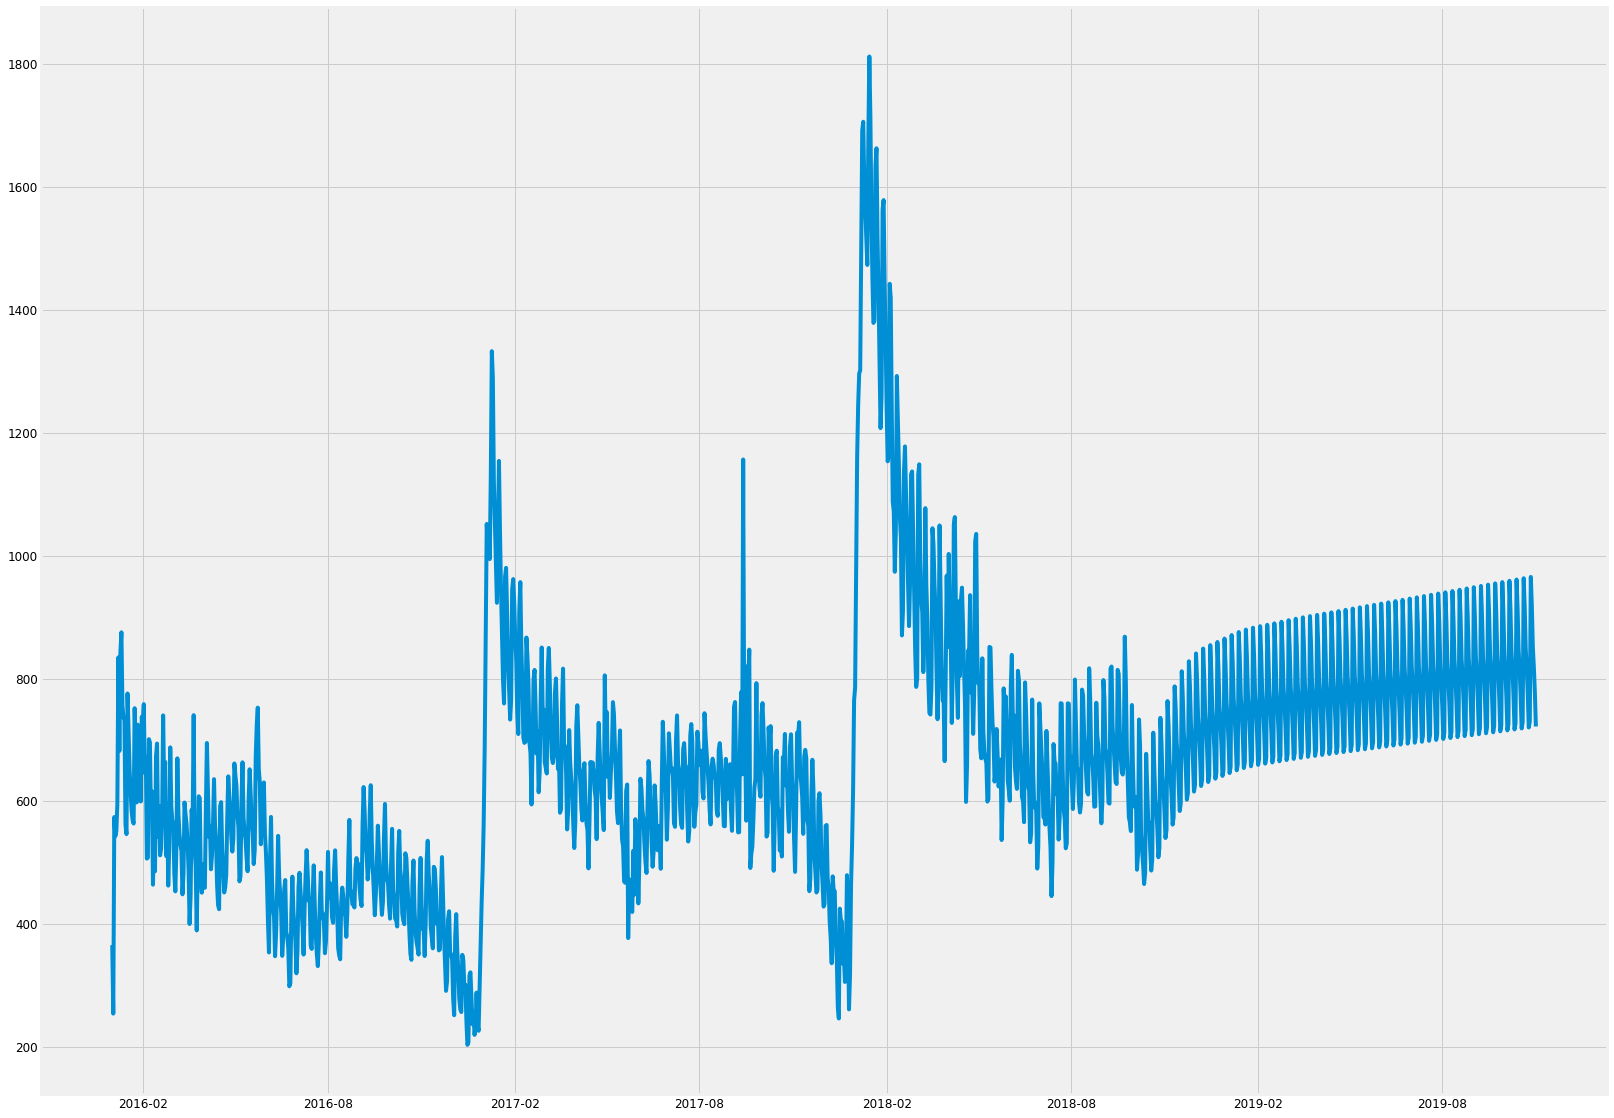

In [95]:
#figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
pred_fcst = results.predict(start=1, end=1400, dynamic=False)
plt.rcParams["figure.figsize"] = [25,20]
plt.plot(pred_fcst)

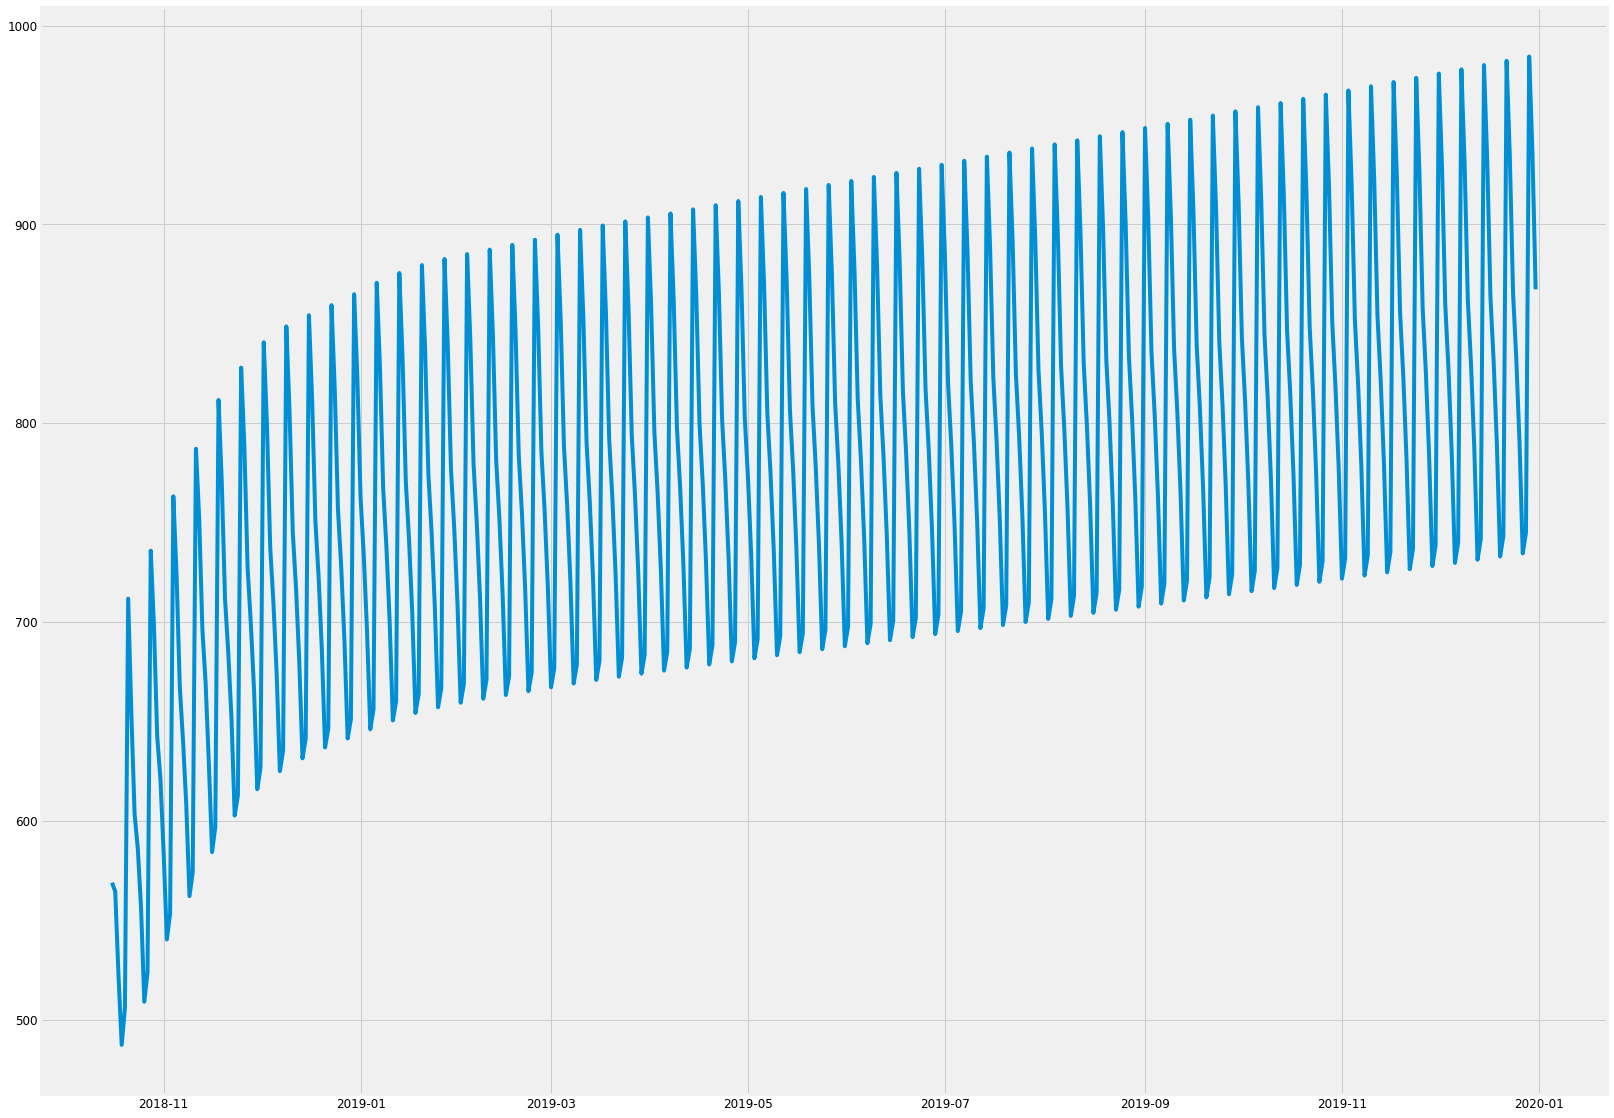

In [96]:
sarima_forecast = results.forecast(442)
plt.plot(sarima_forecast)

In [97]:
pdf = pd.DataFrame(pred_fcst)
pdf.to_csv("predict_sarima.csv")

pdf1 = pd.DataFrame(sarima_forecast)
pdf1.to_csv("forecast_sarima.csv")


In [177]:
pred = results.get_prediction(start=1, end = 2000, dynamic=False)
pred_ci = pred.conf_int()

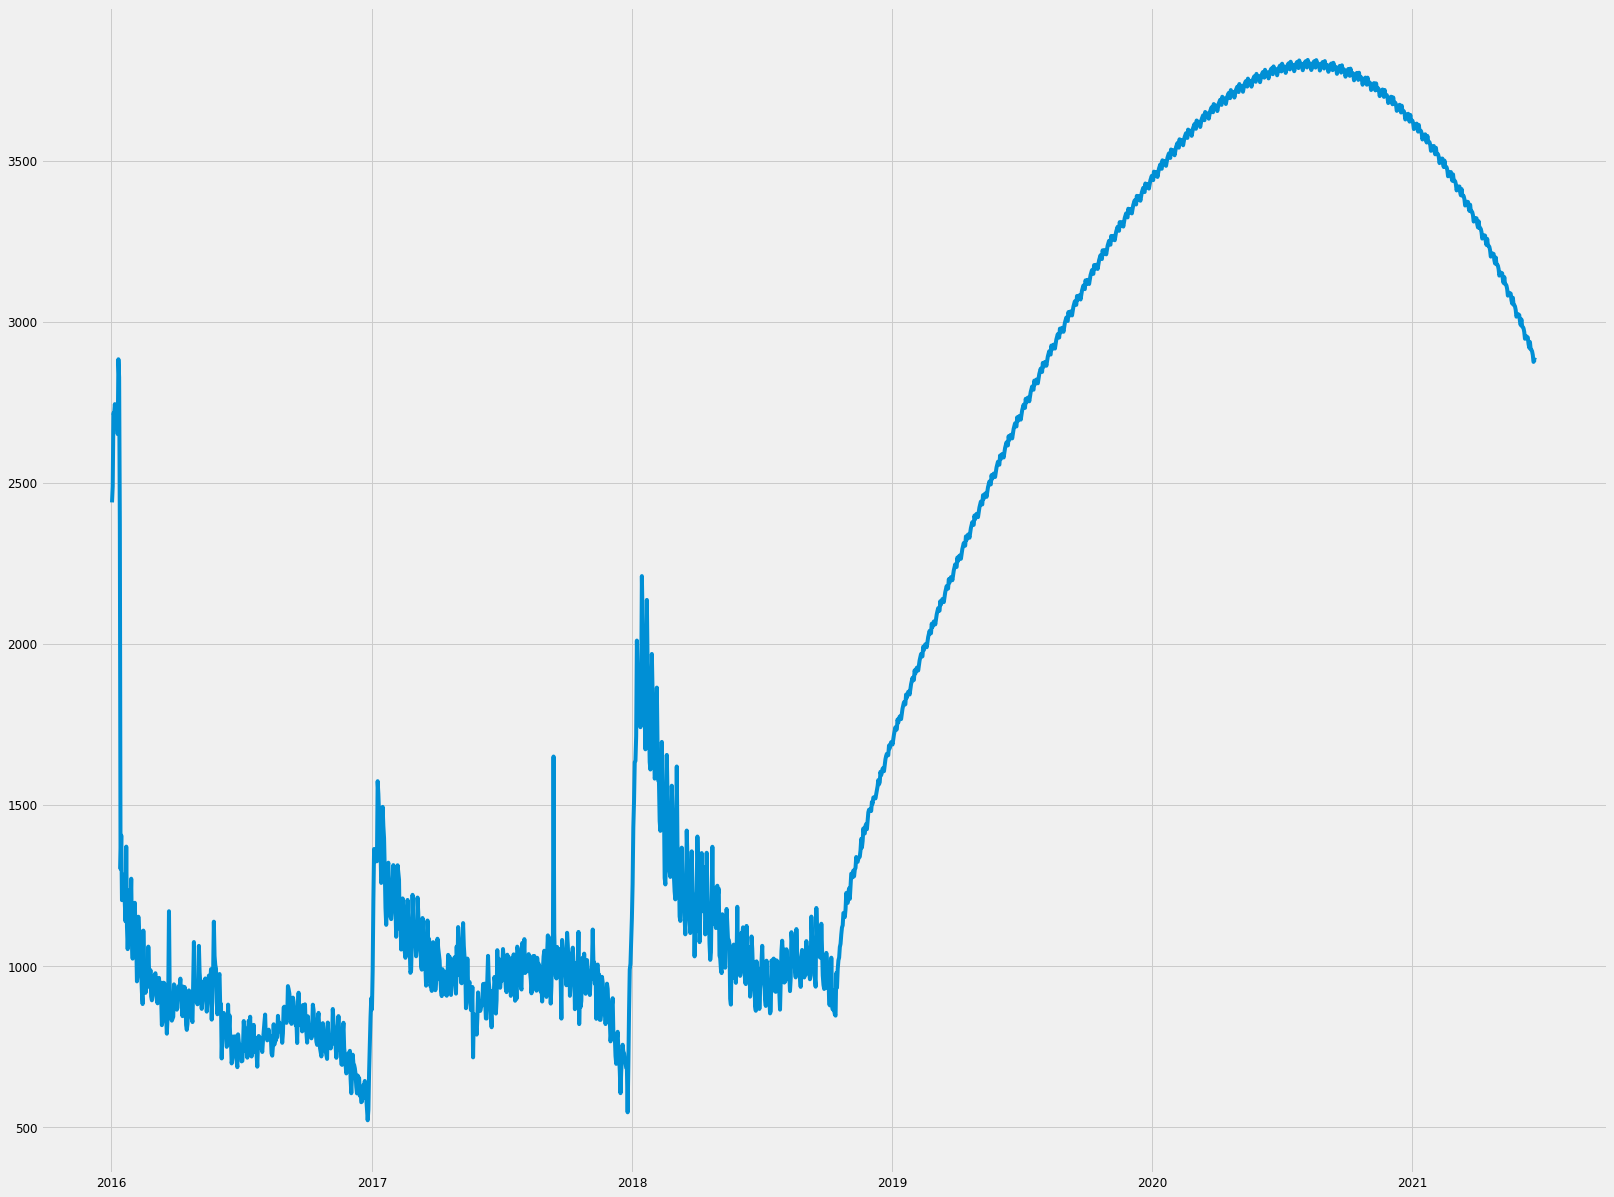

In [178]:
plt.plot(pred_ci['upper nb'])

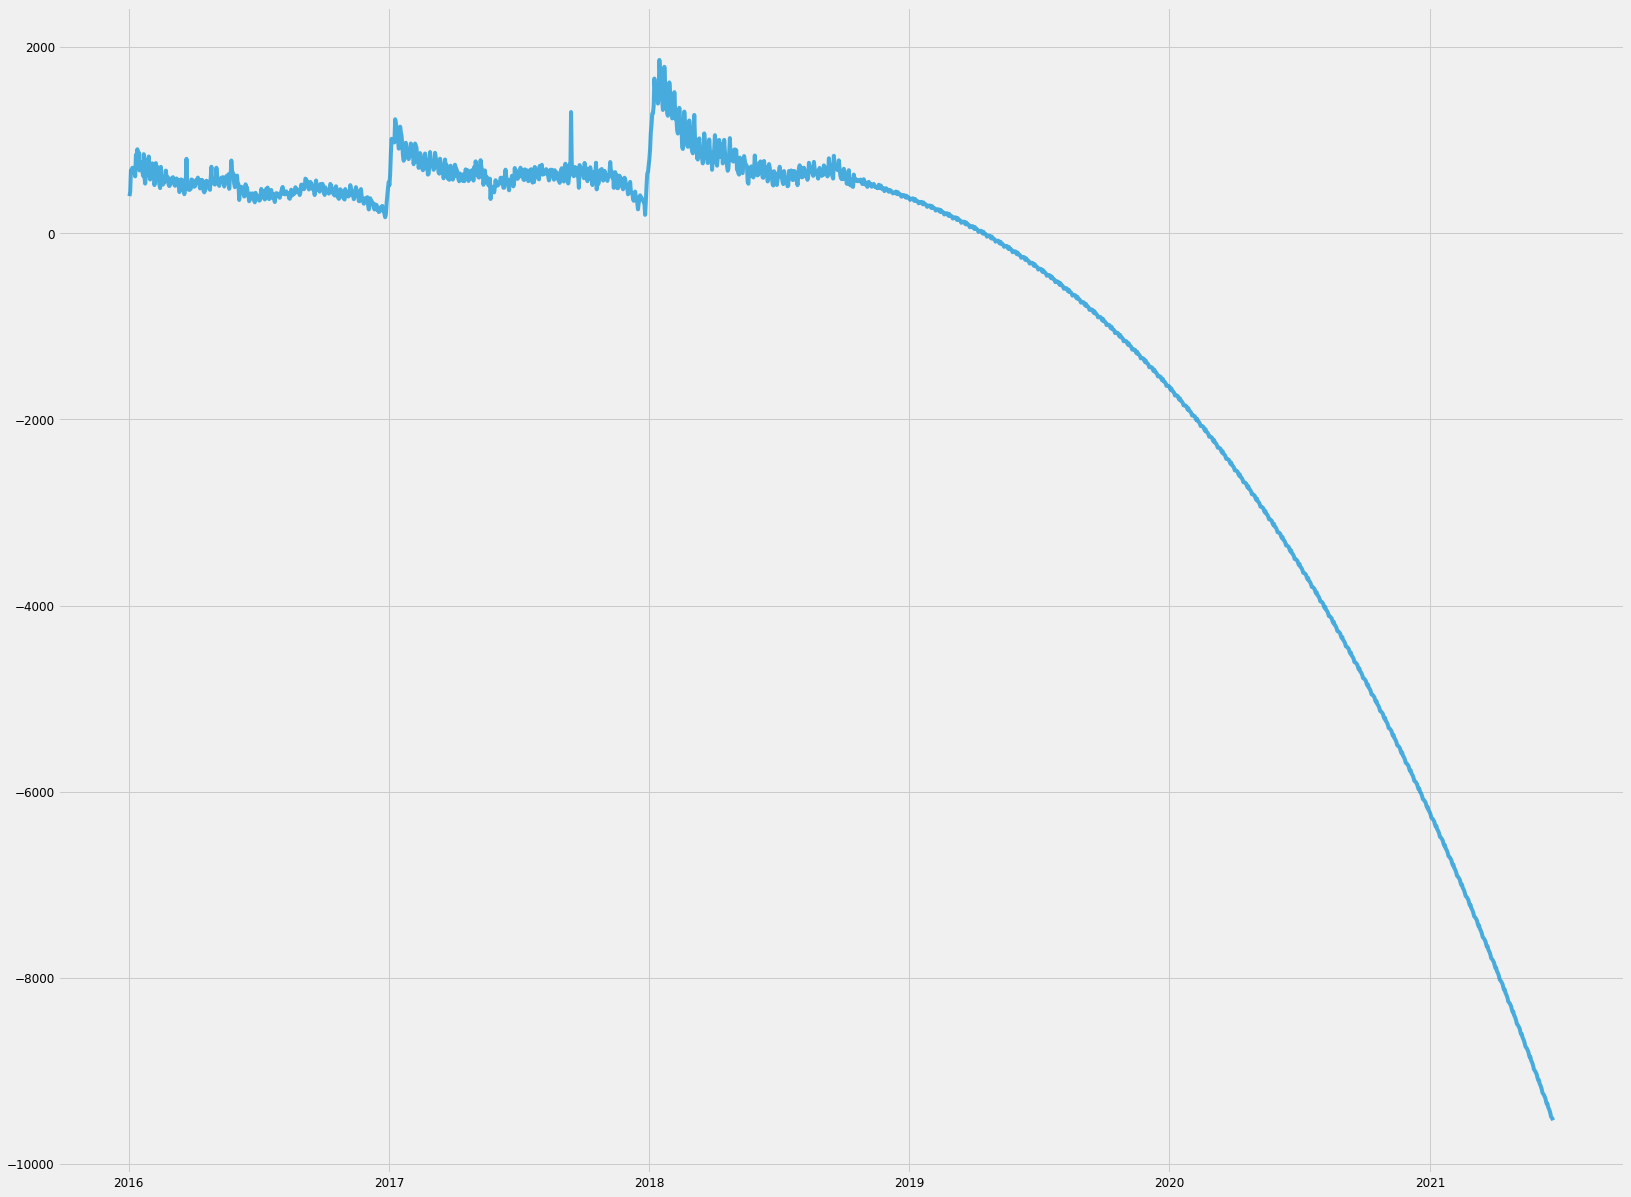

In [179]:
pred.predicted_mean.plot(label='One-step ahead Forecast', alpha=.7)

In [ ]:
# TO DO WKND
1. ARIMA_grid_search_copy1 == code SARIMA similar to do w/ just 2 functions (evaluate_arima_model & evaluate_models)
1A. Change 'm' for SARIMA (12, 6, 0, 365, others?) (0,2):365,0,6,12|(0,3):12|(0,4):12|(0,4):30 
best so far: SARIMAX(3, 0, 3)x(0, 0, 3, 12)
    SARIMAX(3, 0, 3)x(2, 0, 3, 30)
    SARIMAX(12, 0, 3)x(12, 0, 3, 12)
    SARIMAX(3, 1, 2)x(3, 1, 2, 12)
1B. Try dynamic=True when using 'predict'/also tried w/ dynamic=False (see desktop for plots)
1C. Try d=1; D=1
2. Try pyramid.arima again
3. If 1 & 2 don't work, wrap up the above code and post it on GitHub (saying combining isn't working)
3A. Also, try grid searching (0,4) / (0,2) - DONE
4. Incl regressors to Prophet (start w/ Arima vs Prophet.ipynb)
5. 2019 bookings lower by 15%-20%.  Is this due to lower visits forecasts? Examine visits YoY (real) and forecasts?
5A. See other Test 9 forecasts (similar to the bar charts)
6. chk the index after filtering out reg/mrkt - change index to date (daily)
6A. try w/ date.index s = 12
6B. try w/ date.index s = 365
7. do lstm w/ univariate and multivariate
8. try pyflux (arima, dar, garch)

# next logical steps
# chk on prophet, prophet w/ visits in py (if not, try this)
# keep in arima, sarimax in R (chk w/ Tim)
# share HW in py
# share arima, sarima in py but issues w/ forecasts
# before end of Nov - py code to run prophet, prophet_visits, hw
# in dec (before end of Dec) - R code to run arima, sarimax
# try lstm/keras on the side

In [ ]:
### pip install pyramid-arima (make sure to vpn to hmwy network)

from pyramid.arima import auto_arima
stepwise_model = auto_arima(data, start_p=0, start_q=0,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

In [ ]:
# try this - arma grid search, interpreting p,q from acf/pacf, and run arima & sarima based on results
# https://www.kaggle.com/poiupoiu/how-to-use-sarimax